In [36]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math

In [44]:
def f_comp(x,y,a,b,c,d):
    v=.5*(a*x*y+b*x/y+c*y/x+d/(x*y))+math.sqrt(a*b)*x+math.sqrt(c*d)/x+math.sqrt(a*c)*y+math.sqrt(b*d)/y
    return v

In [37]:
diff=np.array([])

for x in range(10000):
#     generator new random numbers with constraint
    a=random.uniform(0, 1)
    b=random.uniform(0, 1)
    c=random.uniform(0, 1)
    d=random.uniform(0, 1)
    
    value=.5*(a+b+c+d)+math.sqrt(a*d)+math.sqrt(c*d)+math.sqrt(a*c)+math.sqrt(b*d)-math.sqrt(a*d)-math.sqrt(b*c)-4*pow(a*b*c*d,.25)
    diff=np.append(diff,value)

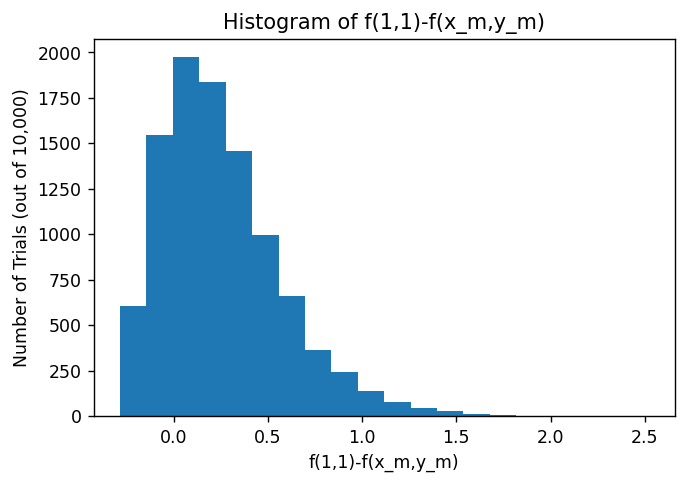

In [38]:
plt.rcParams['figure.dpi'] = 125
plt.hist(diff,bins=20,density=False)
plt.title('Histogram of f(1,1)-f(x_m,y_m)')
plt.ylabel('Number of Trials (out of 10,000)')
plt.xlabel('f(1,1)-f(x_m,y_m)')
plt.show()

In [43]:
neg_diff=np.array([])
for x in diff:
    if x<0:
        neg_diff=np.append(neg_diff,x)
len(neg_diff)/len(diff)

0.2206

In [77]:
diff_min=[]
worst=0
def f_simp(v, args):
    a, b, c, d = args
    return f_comp(v[0],v[1],a,b,c,d)

for x in range(2000):
#     generator new random numbers with constraint
    a=random.uniform(0, 1)
    b=random.uniform(0, 1)
    c=random.uniform(0, 1)
    d=random.uniform(0, 1)
    approx_min=math.sqrt(a*d)+math.sqrt(b*c)+4*((a*b*c*d)**.25)
    xm=(c*d/(a*b))**.25
    ym=(b*d/(a*c))**.25
    

    min_val=opt.minimize(lambda x: f_simp(x, (a, b, c, d)),(xm,ym),bounds=((.00001,np.inf),(.00001,np.inf)))
#     print(min_val)
    f_min=min_val.fun
#     diff_min=np.append(diff_min,approx_min-f_min)
    diff_min.append(approx_min-f_min)
#     print("x_min_approx = ", xm)
#     print("y_min_approx = ", ym)
    
    if approx_min-f_min<worst:
        worst=approx_min-f_min
        f_worst=f_min
        a_w=a
        b_w=b
        c_w=c
        d_w=d
        approx_w=approx_min
        

Text(0.5, 0, 'f(x_m,y_m)-f(x_{min},y_{min}')

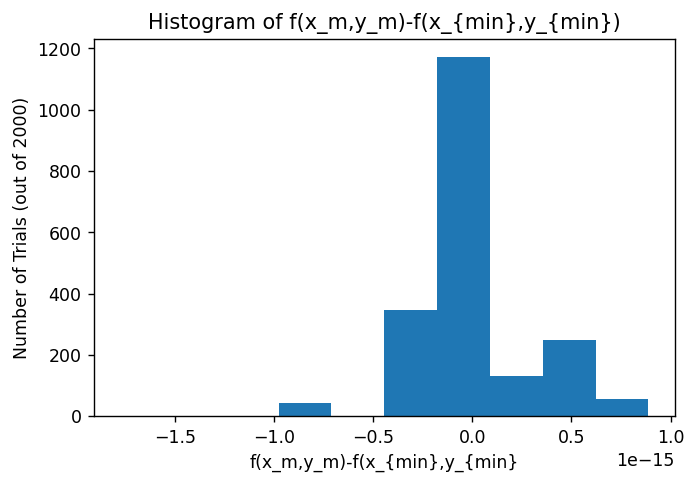

In [80]:
plt.hist(diff_min,bins=10)
plt.title('Histogram of f(x_m,y_m)-f(x_{min},y_{min})')
plt.ylabel('Number of Trials (out of 2000)')
plt.xlabel('f(x_m,y_m)-f(x_{min},y_{min}')


In [69]:
neg_diff=np.array([])
for x in diff_min:
    if x<0:
        neg_diff=np.append(neg_diff,x)
len(neg_diff)/len(diff_min)

1.0

In [19]:
def f_simp_try(v):
        return f_comp(v[0],v[1],a_w,b_w,c_w,d_w)
min=opt.minimize(f_simp,(1,1),bounds=((.00001,np.inf),(.00001,np.inf)))
f_min_bad=min.fun
approx_min_worst=pow(a_w*d_w,.5)+pow(b_w*c_w,.5)+4*pow(a_w*b_w*c_w*d_w,.25)

In [58]:
f_worst

0.6615744402714359

In [59]:
approx_w

0.6615744373248389